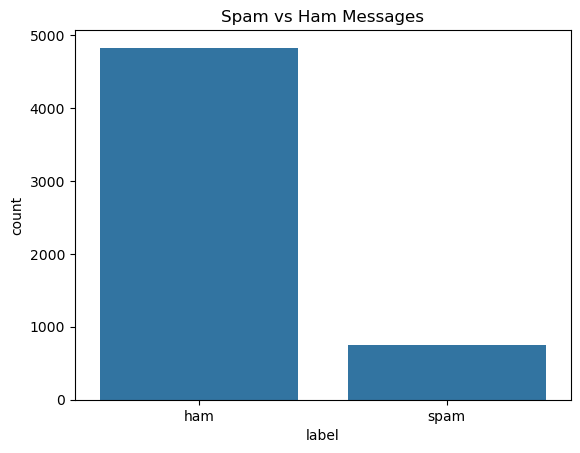

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Soumya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 0.9741564967695621

Confusion Matrix:
 [[1202    0]
 [  36  155]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      1202
           1       1.00      0.81      0.90       191

    accuracy                           0.97      1393
   macro avg       0.99      0.91      0.94      1393
weighted avg       0.97      0.97      0.97      1393

Spam


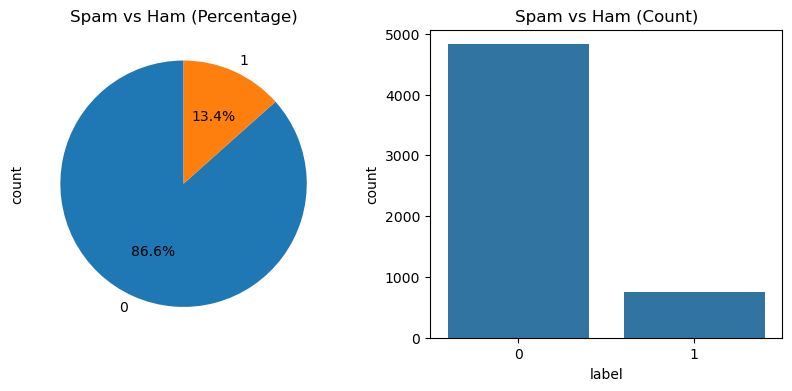

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df = pd.read_csv(r"C:\Users\Soumya\Desktop\Data Science Project\spam.csv", encoding="latin-1")
df = df[['v1', 'v2']]
df.columns = ['label', 'message']
df['label'].value_counts()
sns.countplot(x='label', data=df)
plt.title("Spam vs Ham Messages")
plt.show()

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

df['cleaned_message'] = df['message'].apply(clean_text)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['cleaned_message'])
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

sample_email = ["Congratulations! You have won a free mobile recharge. Click now"]
sample_cleaned = [clean_text(sample_email[0])]
sample_vector = vectorizer.transform(sample_cleaned)

prediction = model.predict(sample_vector)

print("Spam" if prediction[0] == 1 else "Not Spam")

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
df['label'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Spam vs Ham (Percentage)")

plt.subplot(1,2,2)
sns.countplot(x='label', data=df)
plt.title("Spam vs Ham (Count)")

plt.show()


